<a href="https://colab.research.google.com/github/utkudener/Face-Detection-with-Deep-Learning/blob/main/FullyConnectedVersion1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
import tensorflow as tf
import glob
import PIL
import cv2

from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import glob
import random
from sklearn.model_selection import train_test_split

# Negatif ve pozitif veri yollarını ayarlayın
base_negatif_path = "/content/drive/MyDrive/SMILEs/negatives/negatives7"
base_pozitif_path = "/content/drive/MyDrive/SMILEs/positives/positives7"
img_height = 64
img_width = 64
batch_size = 32

# Veri seti yükleme ve etiketleme
image_data = []
labels = []

# Negatif resimler
negatives = list(glob.glob(f"{base_negatif_path}/*.jpg"))
print(f"Found {len(negatives)} negative images.")



for image_path in negatives:
    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(img_height, img_width), color_mode='grayscale'
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    image_data.append(img_array)
    labels.append(0)  # Negatif olarak etiketleme

# Pozitif resimler
positives = list(glob.glob(f"{base_pozitif_path}/*.jpg"))
print(f"Found {len(positives)} positive images.")
for image_path in positives:
    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(img_height, img_width), color_mode='grayscale'
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    image_data.append(img_array)
    labels.append(1)  # Pozitif olarak etiketleme

# Kontrol: Resimler alındı mı?
print(f"Total images loaded: {len(image_data)}")
if len(image_data) == 0:
    print("No images were loaded. Please check your paths and ensure the images exist.")
else:
    print("Images successfully loaded.")

# Veriyi numpy array'e dönüştürme
image_data = np.array(image_data)
labels = np.array(labels)

# Kontrol: Numpy array boyutları
print(f"image_data shape: {image_data.shape}")
print(f"labels shape: {labels.shape}")

# Veriyi train ve validation setlerine ayırma
train_images, val_images, train_labels, val_labels = train_test_split(image_data, labels, test_size=0.2, random_state=123)

# Kontrol: Train ve validation set boyutları
print(f"Train images shape: {train_images.shape}")
print(f"Validation images shape: {val_images.shape}")

# Veriyi tf.data.Dataset'e dönüştürme
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).batch(batch_size)


class_names = ["Negative", "Positive"]


Found 9475 negative images.
Found 3690 positive images.
Total images loaded: 13165
Images successfully loaded.
image_data shape: (13165, 64, 64, 1)
labels shape: (13165,)
Train images shape: (10532, 64, 64, 1)
Validation images shape: (2633, 64, 64, 1)


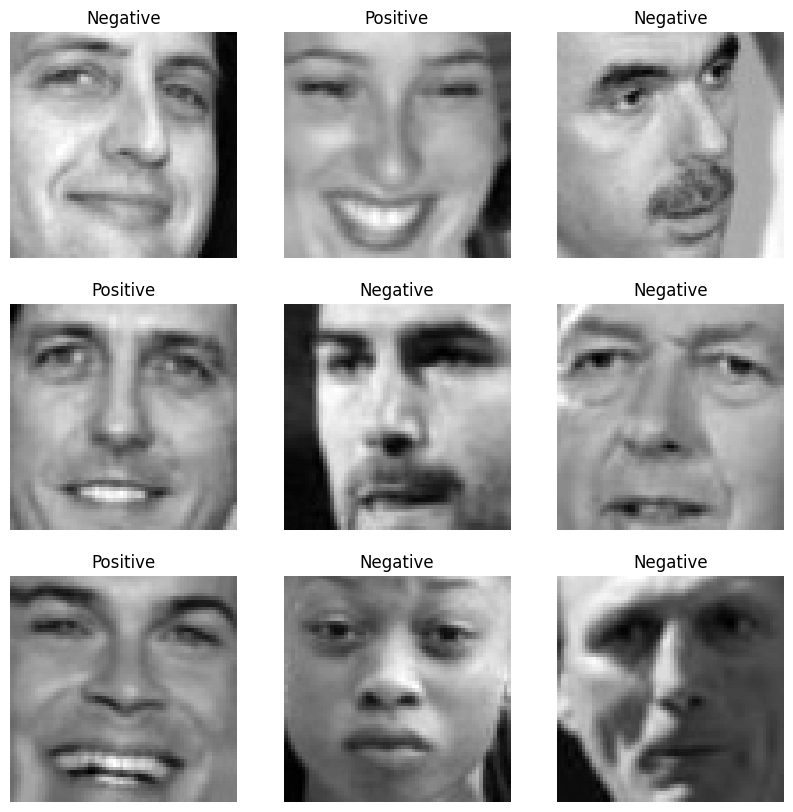

In [ ]:
import matplotlib.pyplot as plt

# Eğitim veri setinden bir batch alın ve örnek görüntüleri çizdirin
def plot_sample_images(images, labels, class_names, num_samples=9):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].reshape(img_height, img_width), cmap='gray')
        plt.title(class_names[labels[i]])
        plt.axis("off")
    plt.show()

# Etiket isimleri
class_names = ['Negative', 'Positive']

# İlk 9 örneği görselleştirme
plot_sample_images(train_images, train_labels, class_names)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization


# Modeli oluşturma
model_ffnn = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
    layers.Flatten(input_shape=(64,64)),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_ffnn.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# Model yapısını gösterme
model_ffnn.summary()




Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_22 (Rescaling)    (None, 64, 64, 1)         0         
                                                                 
 flatten_22 (Flatten)        (None, 4096)              0         
                                                                 
 dense_85 (Dense)            (None, 128)               524416    
                                                                 
 dense_86 (Dense)            (None, 1)                 129       
                                                                 
Total params: 524545 (2.00 MB)
Trainable params: 524545 (2.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Modeli eğitme
epochs = 20
history = model_ffnn.fit(train_images, train_labels, batch_size=32, epochs=20, validation_data=(val_images, val_labels))


Epoch 1/20
330/330 [==============================] - 2s 4ms/step - loss: 0.5108 - accuracy: 0.7657 - val_loss: 0.3705 - val_accuracy: 0.8382
Epoch 2/20
330/330 [==============================] - 1s 3ms/step - loss: 0.3769 - accuracy: 0.8329 - val_loss: 0.3720 - val_accuracy: 0.8367
Epoch 3/20
330/330 [==============================] - 1s 3ms/step - loss: 0.3745 - accuracy: 0.8363 - val_loss: 0.5467 - val_accuracy: 0.7736
Epoch 4/20
330/330 [==============================] - 1s 3ms/step - loss: 0.3785 - accuracy: 0.8348 - val_loss: 0.3941 - val_accuracy: 0.8261
Epoch 5/20
330/330 [==============================] - 1s 3ms/step - loss: 0.3436 - accuracy: 0.8512 - val_loss: 0.3391 - val_accuracy: 0.8553
Epoch 6/20
330/330 [==============================] - 1s 3ms/step - loss: 0.3585 - accuracy: 0.8427 - val_loss: 0.3297 - val_accuracy: 0.8587
Epoch 7/20
330/330 [==============================] - 1s 3ms/step - loss: 0.3486 - accuracy: 0.8493 - val_loss: 0.3305 - val_accuracy: 0.8557
Epoch 

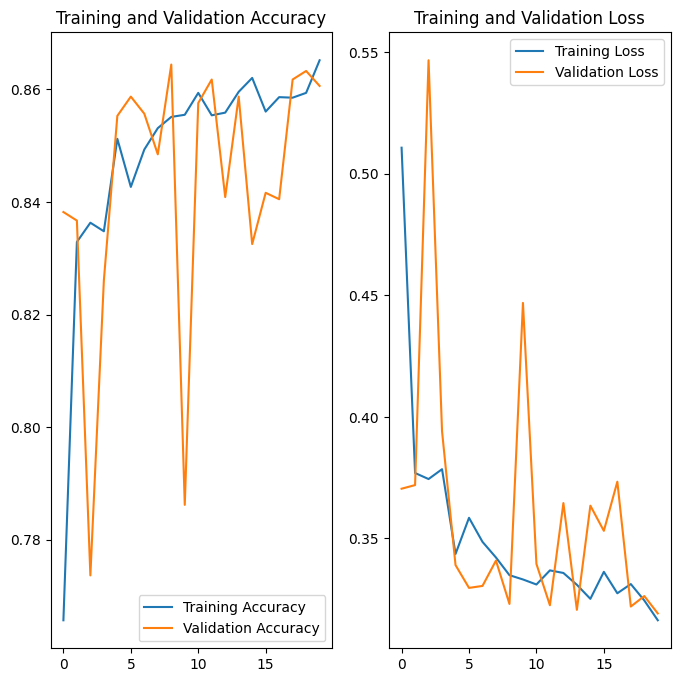

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()